In [90]:
#libraries for data analysis
import pandas as pd
import numpy as np

#libraries for data visualisation
import matplotlib.pyplot as plt
import seaborn as sns

#With the Counter class, you can create a special type of dictionary where elements are stored as dictionary keys and their counts as dictionary values.
from collections import Counter

#libraries for Feature Engineering
from sklearn.decomposition import PCA
from sklearn.manifold import TSNE

#hyperparameter tuning of machine learning models using randomized search
from sklearn.model_selection import RandomizedSearchCV

#machine learning algorithms
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

#evaluate the performance of the model
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [6]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [7]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [8]:
train.columns

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [9]:
train["subject"].nunique()

21

In [10]:
train["subject"].value_counts()

25    409
21    408
26    392
30    383
28    382
27    376
23    372
17    368
16    366
19    360
1     347
29    344
3     341
15    328
6     325
14    323
22    321
11    316
7     308
5     302
8     281
Name: subject, dtype: int64

# Data Preprocessing

#### 3.a Checking of duplicates

In [11]:
print("No. of duplicates in Train Dataset : ", sum(train.duplicated()))
print("No. of duplicates in Test Dataset : ", sum(test.duplicated()))

No. of duplicates in Train Dataset :  0
No. of duplicates in Test Dataset :  0


#### 3.b Checking for missing values

In [12]:
print("No. of missing values in Train Dataset : ", train.isna().values.sum())
print("No. of missing values in Test Dataset : ", test.isna().values.sum())

No. of missing values in Train Dataset :  0
No. of missing values in Test Dataset :  0


#### 3.c Checking for class imbalance

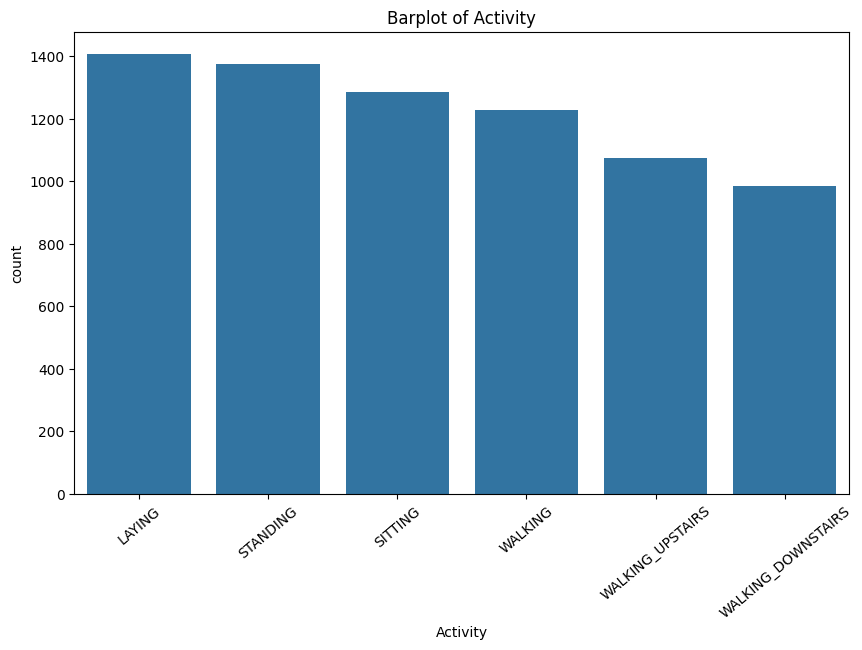

In [13]:
plt.figure(figsize=[10,6])
plt.title("Barplot of Activity")
sns.countplot(x=train.Activity, order=train.Activity.value_counts().index)
plt.xticks(rotation=40)
plt.show()

#### There is almost same number of observations across all the six activities so this data does not have class imbalance problem.

# Exploratory Data Analysis

In [14]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [15]:
# we see that there are many parameters and thus we will try to reduce the features for viewing and get a better understanding

In [16]:
pd.DataFrame.from_dict(Counter([col.split("-")[0].split("(")[0] for col in train.columns]), orient="index").rename(columns={0:"count"}).sort_values(by="count", ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


In [17]:
train["Activity"].unique()

array(['STANDING', 'SITTING', 'LAYING', 'WALKING', 'WALKING_DOWNSTAIRS',
       'WALKING_UPSTAIRS'], dtype=object)

<p>
Mainly there are 'acceleration' and 'gyroscope' features. A few 'gravity' features are there as well. Impressive how many features there are in regard to the limited number of sensors used.
</p>
<p>
Based on the common nature of activities we can broadly put them in two categories.
</p>
<p>
<strong>Static and dynamic activities:</strong>
SITTING, STANDING, LAYING can be considered as static activities with no motion involved.
WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with a significant amount of motion involved.
</p>
<p>
Let's consider the tBodyAccMag-mean() feature to differentiate among these two broader set of activities.
</p>
<p>
If we try to build a simple classification model to classify the activity using one variable at a time, then the probability density function (PDF) is very helpful to assess the importance of a continuous variable.
</p>

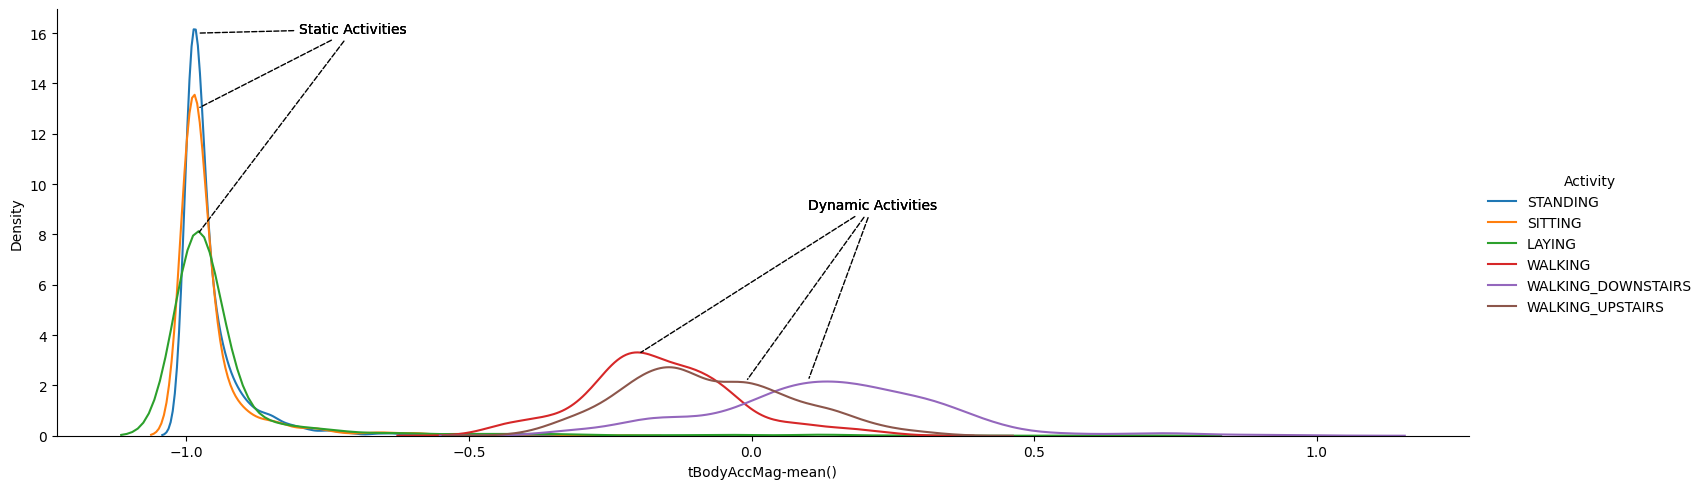

In [18]:
facetgrid = sns.FacetGrid(train, hue="Activity", height=5, aspect=3)
facetgrid.map(sns.distplot, "tBodyAccMag-mean()", hist=False).add_legend()

plt.annotate("Static Activities", xy = (-.98, 8), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 13), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy = (-.98, 16), xytext = (-.8, 16), arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

plt.show()

In [19]:
# we see the for the static activities the acceleration of the body is less as compared to the acceleration in dynamic activities

<p>Using the above density plot, we can easily come up with a condition to separate static activities from dynamic activities:</p>
<code>if(tBodyAccMag-mean() <= -0.5):<br>&emsp;Activity = "static"<br>else:<br>&emsp;Activity = "dynamic"</code>
    
<p>Let's have a closer look at the probability density functions (PDFs) of each activity under static and dynamic categorization:</p>
<code>if(tBodyAccMag-mean() <= -0.5):<br>&emsp;Plot PDF for static activities<br>else:<br>&emsp;Plot PDF for dynamic activities</code>/html>
/html>
amic"

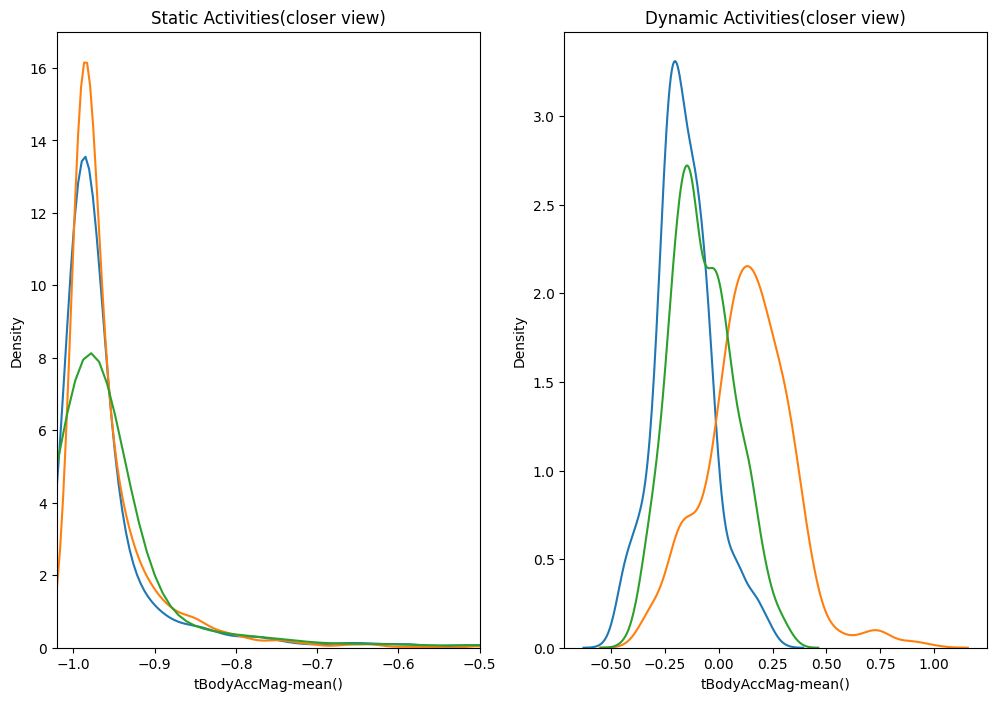

In [20]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 17])

plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')
plt.show()

### The insights obtained through density plots can also be represented using Box plots. Let's plot the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories.

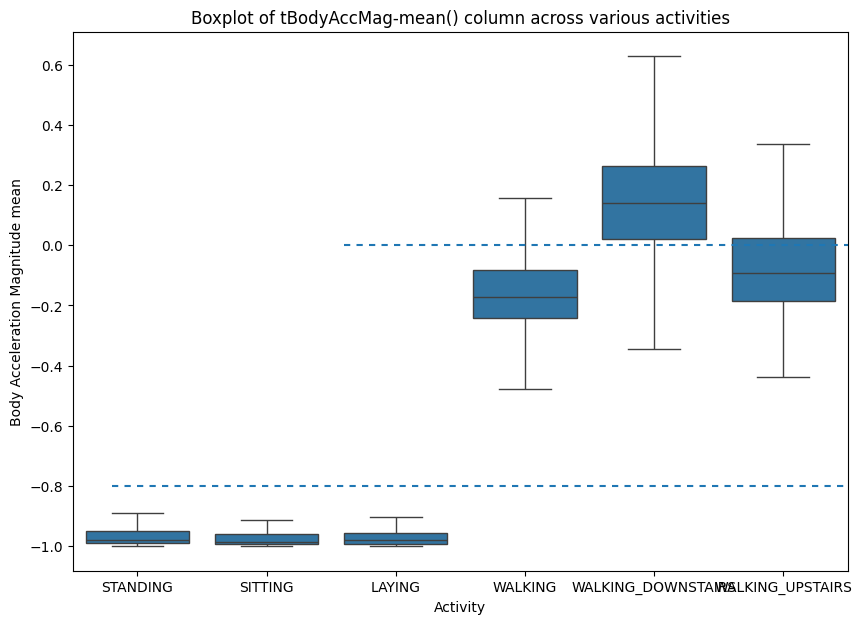

In [21]:
plt.figure(figsize=(10,7))
sns.boxplot(x = "Activity", y="tBodyAccMag-mean()", data = train, showfliers = False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y = -0.8, xmin = 0.05, dashes = (3,3))
plt.axhline(y= 0.0, xmin = 0.35, dashes=(3,3))
plt.show()

<p>Using boxplot again we can come with conditions to separate static activities from dynamic activities:</p>

<code>if(tBodyAccMag-mean() <= -0.8):<br>&emsp;Activity = "static"<br>if(tBodyAccMag-mean() >= -0.6):<br>&emsp;Activity = "dynamic"</code>

<p>Also, we can easily separate the WALKING_DOWNSTAIRS activity from others using a boxplot:</p>

<code>if(tBodyAccMag-mean() > 0.02):<br>&emsp;Activity = "WALKING_DOWNSTAIRS"<br>else:<br>&emsp;Activity = "others"</code>

<p>But still, 25% of WALKING_DOWNSTAIRS observations are below 0.02, which are misclassified as others. So, this condition makes an error of 25% in classification.</p>


### Analysing Angle between X-axis and gravityMean feature

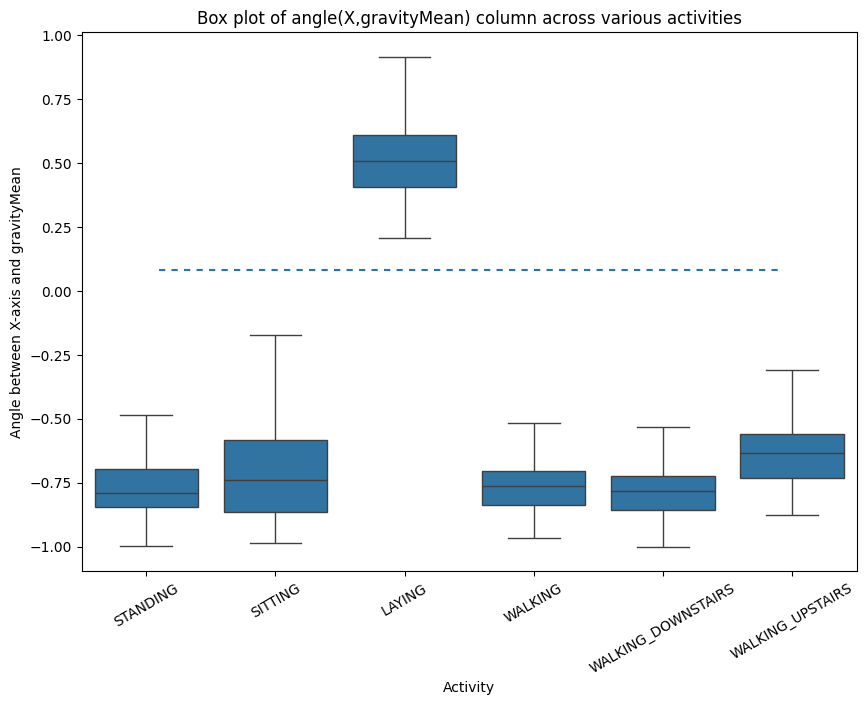

In [22]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)
plt.show()

<p>From the boxplot, we can observe that angle(X,gravityMean) perfectly separates LAYING from other activities:</p>

<code>if(angle(X,gravityMean) > 0.01):<br>&emsp;Activity = "LAYING"<br>else:<br>&emsp;Activity = "others"</cod>


### Analysing Angle between Y-axis and gravityMean feature

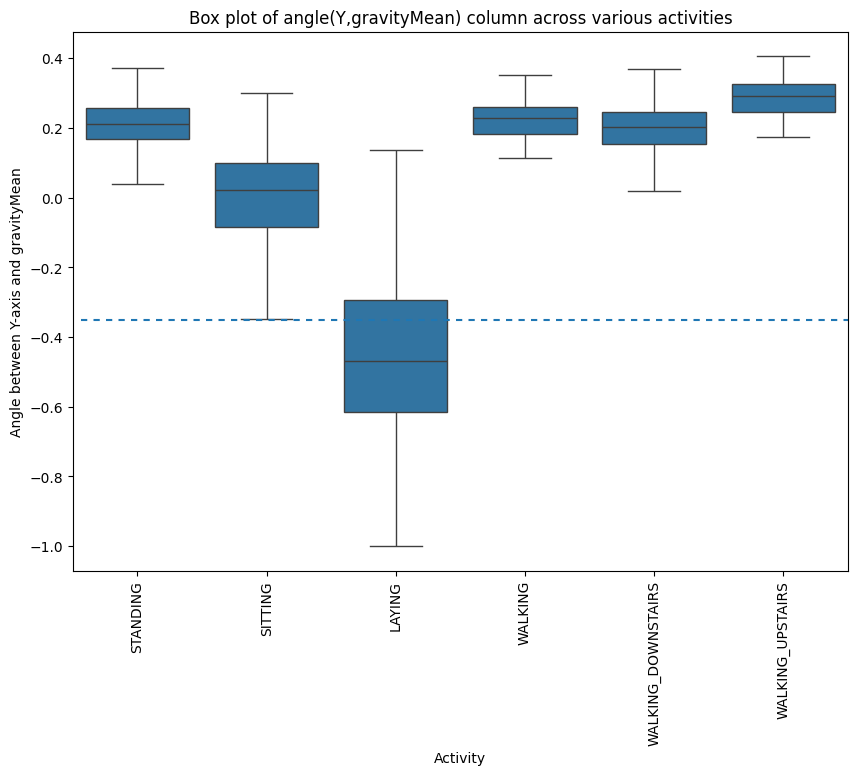

In [23]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))
plt.show()

##### Similarly, using Angle between Y-axis and gravityMean we can seperate LAYING from other activities but again it leads to some misclassification error.

# Visualising Data using PCA

#### Using PCA data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using PCA let's visualize it to a 2D space.

In [24]:
x_forPCA = train.drop(["subject", "Activity"], axis=1)

In [25]:
pca = PCA(n_components = 2, random_state=2).fit_transform(x_forPCA)

In [26]:
pca #we have reduced the 541 features to just 2

array([[-5.5202803 , -0.29027745],
       [-5.53534954, -0.08253024],
       [-5.47498801,  0.28738702],
       ...,
       [ 5.85750527, -3.08184336],
       [ 5.42109482, -3.42642999],
       [ 5.49797027, -2.78992861]])

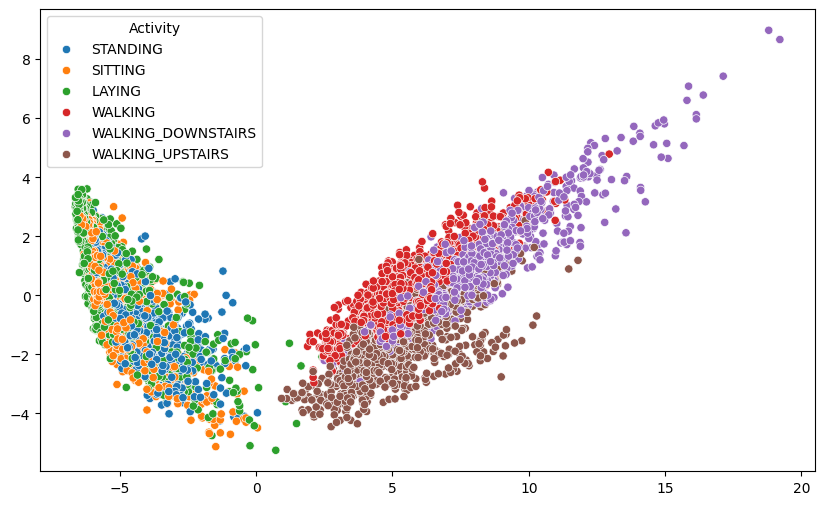

In [27]:
plt.figure(figsize=[10,6])
sns.scatterplot(x = pca[:, 0], y = pca[:, 1], hue = train["Activity"])
plt.show()

##### we observe that the Static Activities are grouped together and the Dynamic Activities are grouped together

# Visualising Data using TSNE

In [28]:
x_forTSNE = train.drop(["subject", "Activity"], axis=1)

In [29]:
tsne = TSNE(n_components=2, random_state=2).fit_transform(x_forTSNE)

In [30]:
tsne

array([[ -7.8175883, -63.471252 ],
       [-25.703287 , -16.941326 ],
       [-27.230917 , -20.272264 ],
       ...,
       [ 23.102922 , -59.668297 ],
       [ 23.093628 , -59.4094   ],
       [ 23.597795 , -58.648018 ]], dtype=float32)

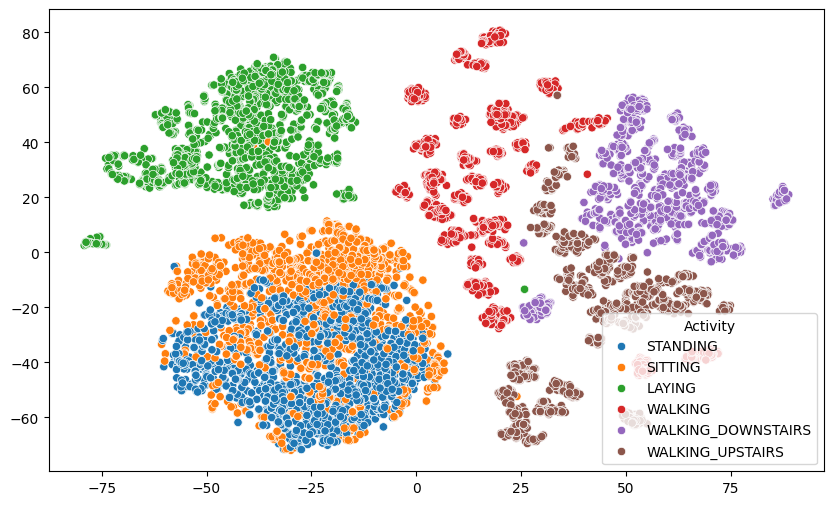

In [31]:
plt.figure(figsize=[10,6])
sns.scatterplot(x=tsne[:, 0], y=tsne[:, 1], hue=train["Activity"])
plt.show()

# ML Models

In [32]:
xtrain = train.drop(["subject", "Activity"], axis=1)
ytrain = train["Activity"]
xtest = test.drop(["subject", "Activity"], axis=1)
ytest = test["Activity"]

In [33]:
print('Training data size : ', xtrain.shape)
print('Test data size : ', xtest.shape)

Training data size :  (7352, 561)
Test data size :  (999, 561)


### Logistic regression model with Hyperparameter tuning and cross validation

<p>This code performs hyperparameter tuning for a logistic regression classifier using randomized search cross-validation. Here's a short description:</p>

<ol>
  <li><strong>Parameters Definition:</strong>
    <ul>
      <li><code>parameters = {'max_iter': [100, 200, 500]}</code>: Defines a dictionary <code>parameters</code> with the hyperparameter <code>max_iter</code> and its possible values as a list <code>[100, 200, 500]</code>.</li>
    </ul>
  </li>

  <li><strong>Classifier Initialization:</strong>
    <ul>
      <li><code>lr_classifier = LogisticRegression()</code>: Initializes a logistic regression classifier object <code>lr_classifier</code> using scikit-learn's <code>LogisticRegression()</code>.</li>
    </ul>
  </li>

  <li><strong>RandomizedSearchCV Setup:</strong>
    <ul>
      <li><code>lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5, random_state=42)</code>: Creates a <code>RandomizedSearchCV</code> object <code>lr_classifier_rs</code>.
        <ul>
          <li>Uses <code>lr_classifier</code> as the base estimator.</li>
          <li>Specifies the hyperparameter space using <code>param_distributions</code>.</li>
          <li>Performs 5-fold cross-validation (<code>cv=5</code>).</li>
          <li>Sets the random state to 42 for reproducibility.</li>
        </ul>
      </li>
    </ul>
  </li>

  <li><strong>Model Fitting:</strong>
    <ul>
      <li><code>lr_classifier_rs.fit(X_train, y_train)</code>: Fits the <code>RandomizedSearchCV</code> object to the training data <code>X_train</code> and <code>y_train</code>. It searches for the best combination of hyperparameters using randomized search and cross-validation.</li>
    </ul>
  </li>

  <li><strong>Prediction:</strong>
    <ul>
      <li><code>y_pred_lr = lr_classifier_rs.predict(X_test)</code>: Predicts the target variable <code>y</code> for the test data <code>X_test</code> using the best model found by <code>RandomizedSearchCV</code>.</li>
    </ul>
  </li>
</ol>


In [34]:
parameters = {"max_iter" : [100,200,500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions = parameters, cv=5, random_state = 40)
lr_classifier_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=LogisticRegression(),
                   param_distributions={'max_iter': [100, 200, 500]},
                   random_state=40)

In [35]:
lr_pred_y = lr_classifier_rs.predict(xtest)

In [36]:
lr_accuracy = accuracy_score(y_true = ytest, y_pred = lr_pred_y)
print("Accuracy of the model using Logistic Regression ", lr_accuracy*100, "%")

Accuracy of the model using Logistic Regression  95.4954954954955 %


In [37]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

In [38]:
cm = confusion_matrix(ytest.values,lr_pred_y)
cm

array([[183,   0,   0,   0,   0,   0],
       [  0, 147,  20,   0,   0,   3],
       [  0,   8, 169,   1,   0,   0],
       [  0,   0,   0, 185,   0,   0],
       [  0,   0,   0,   0, 134,   0],
       [  0,   0,   0,  13,   0, 136]], dtype=int64)

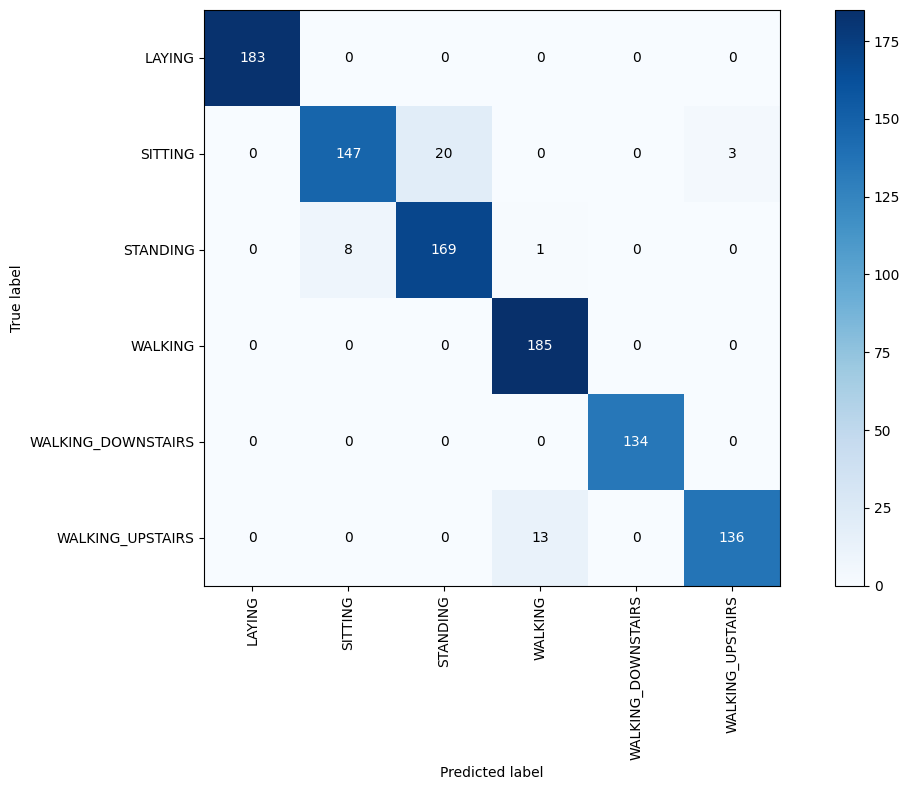

In [39]:
cm = confusion_matrix(ytest.values,lr_pred_y)
plot_confusion_matrix(cm, np.unique(lr_pred_y))

##### A confusion matrix is a table that is often used to describe the performance of a classification model on a set of test data for which the true values are known. It presents a summary of the predictions made by the model compared to the actual labels of the data.

In [40]:
#function to get best random search attributes
def get_best_random_search_estimator(models):
    print("Best Estimator : ", models.best_estimator_)
    print("Best Parameters : ", models.best_params_)
    print("Best Score : ", models.best_score_)

In [41]:
get_best_random_search_estimator(lr_classifier_rs)

Best Estimator :  LogisticRegression(max_iter=500)
Best Parameters :  {'max_iter': 500}
Best Score :  0.9370314053561601


# Kernel SVM model with Hyperparameter tuning and cross validation

In [42]:
parameters = {"kernel" : ["linear", "rbf", "poly", "sigmoid"],
              "C" : [100, 50]}

In [43]:
svc_rs = RandomizedSearchCV(SVC(), param_distributions=parameters, cv = 3, random_state=42)

In [44]:
svc_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=3, estimator=SVC(),
                   param_distributions={'C': [100, 50],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [46]:
svc_pred_y = svc_rs.predict(xtest)

In [50]:
accuracy_svc = accuracy_score(y_true=ytest, y_pred = svc_pred_y)
print("Accuracy of the SVC() Model is ", (accuracy_svc*100), "%")

Accuracy of the SVC() Model is  96.5965965965966 %


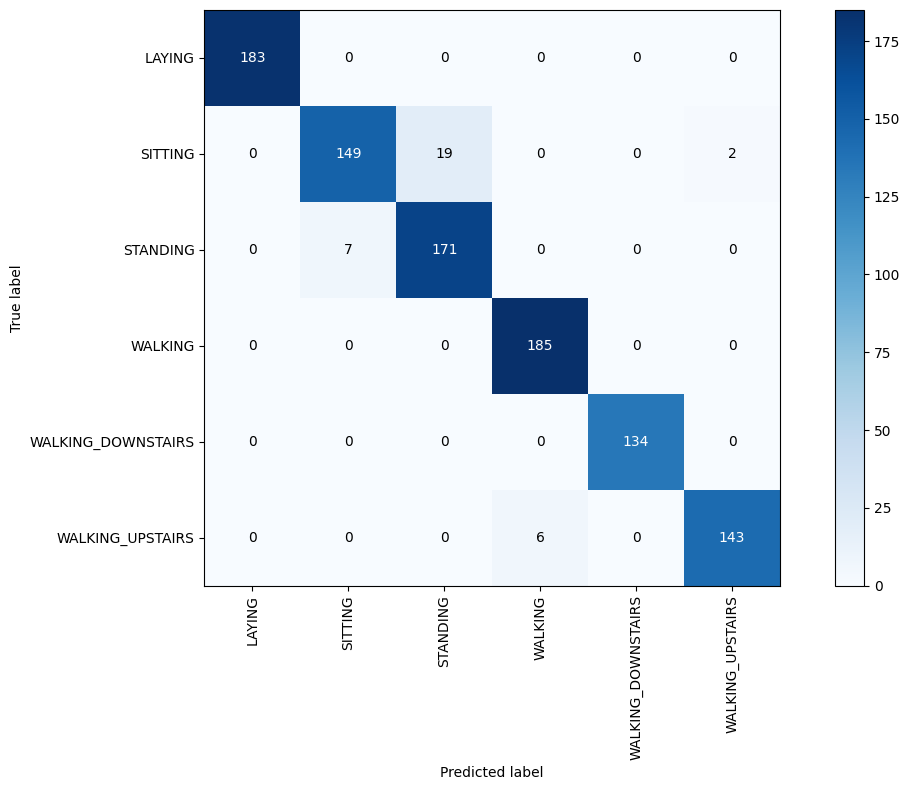

In [54]:
cm = confusion_matrix(ytest.values, svc_pred_y)
plot_confusion_matrix(cm, np.unique(svc_pred_y))

In [56]:
get_best_random_search_estimator(svc_rs)

Best Estimator :  SVC(C=50)
Best Parameters :  {'kernel': 'rbf', 'C': 50}
Best Score :  0.9464109332023303


# Decision tree model with Hyperparameter tuning and cross validation

In [101]:
parameters = {"max_depth" : np.arange(2,20,2)}
dtm_rs = RandomizedSearchCV(DecisionTreeClassifier(), param_distributions=parameters, cv=5, random_state=40)
dtm_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=DecisionTreeClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18])},
                   random_state=40)

In [102]:
dtm_pred_y = dtm_rs.predict(xtest)

In [103]:
dtm_accuracy = accuracy_score(y_true=ytest, y_pred=dtm_pred_y)
print("Accuracy of the Decision Tree Model is : ", (dtm_accuracy*100), "%")

Accuracy of the Decision Tree Model is :  84.38438438438438 %


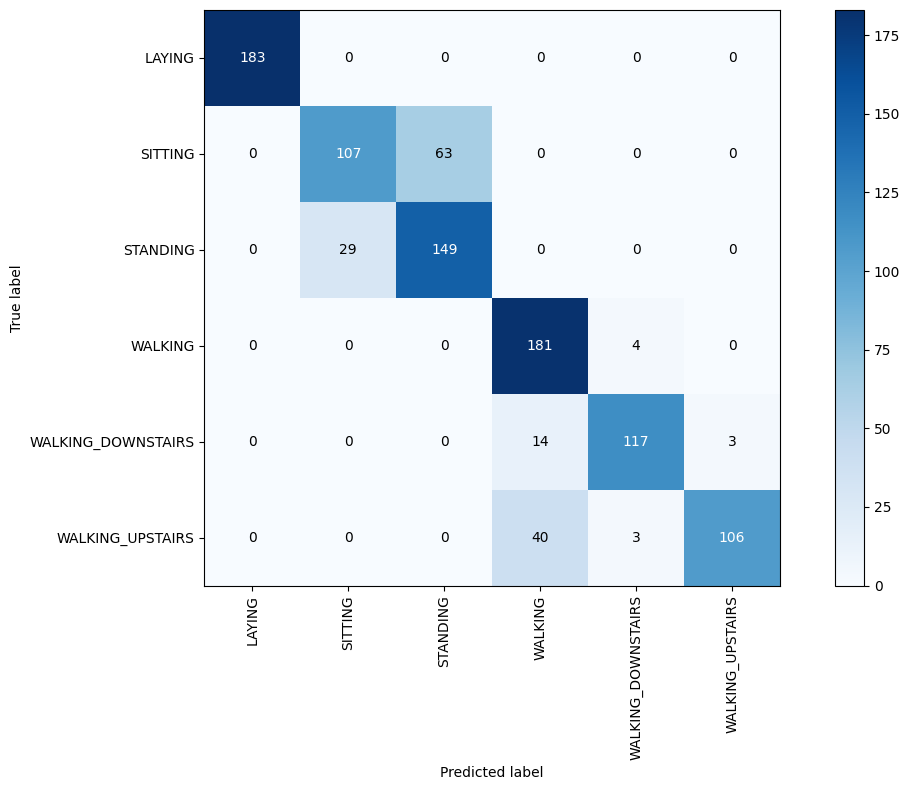

In [104]:
cm = confusion_matrix(ytest.values, dtm_pred_y)
plot_confusion_matrix(cm, np.unique(dtm_pred_y))

In [105]:
get_best_random_search_estimator(dtm_rs)

Best Estimator :  DecisionTreeClassifier(max_depth=8)
Best Parameters :  {'max_depth': 8}
Best Score :  0.8559657227948962


# Random Forest Model with Hyperparameter tuning and Cross Validation

In [83]:
parameters = {"n_estimators" : np.arange(20, 101, 10),
            "max_depth" : np.arange(2,20,2)}
rf_rs = RandomizedSearchCV(RandomForestClassifier(), param_distributions=parameters, cv=5, random_state=40)
rf_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=RandomForestClassifier(),
                   param_distributions={'max_depth': array([ 2,  4,  6,  8, 10, 12, 14, 16, 18]),
                                        'n_estimators': array([ 20,  30,  40,  50,  60,  70,  80,  90, 100])},
                   random_state=40)

In [84]:
rf_pred_y = rf_rs.predict(xtest)

In [85]:
rf_accuracy = accuracy_score(y_true = ytest, y_pred = rf_pred_y)
print("Accuracy of the Random Forest Model : ", (rf_accuracy*100), "%")

Accuracy of the Random Forest Model :  92.49249249249249 %


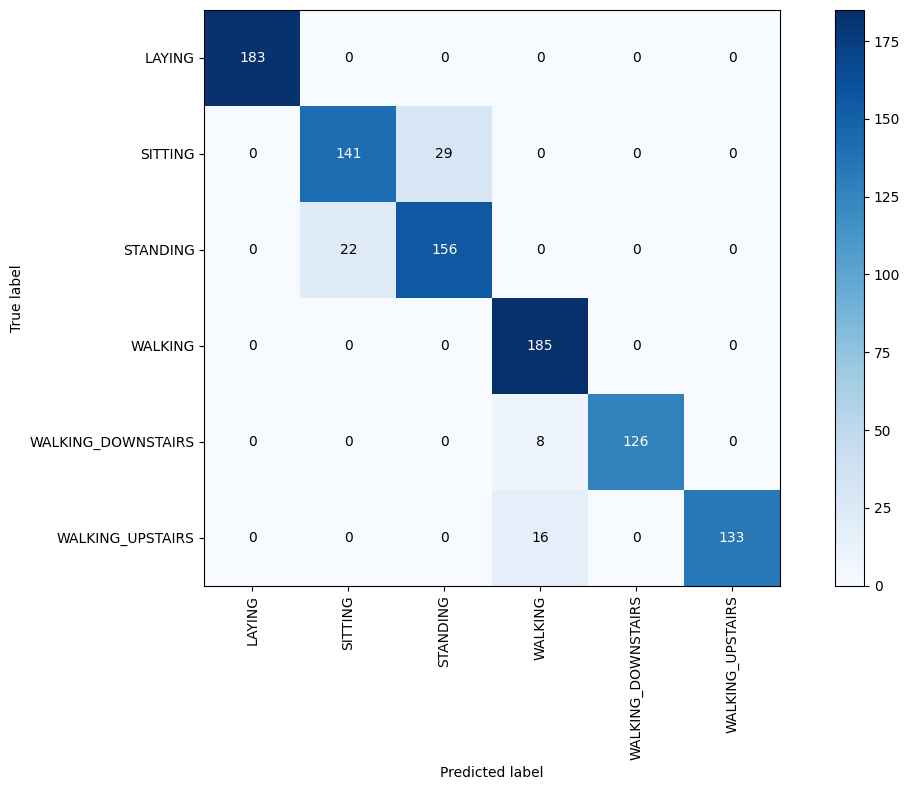

In [87]:
cm = confusion_matrix(ytest.values, rf_pred_y)
plot_confusion_matrix(cm, np.unique(rf_pred_y))

In [88]:
get_best_random_search_estimator(rf_rs)

Best Estimator :  RandomForestClassifier(max_depth=16, n_estimators=80)
Best Parameters :  {'n_estimators': 80, 'max_depth': 16}
Best Score :  0.9181218755347142


# KNN Classifier Model with Hyperparameter tuning and Cross Validation

In [91]:
parameters = {"n_neighbors" : range(1, 20)}
knn_rs = RandomizedSearchCV(KNeighborsClassifier(), param_distributions = parameters, cv=5, random_state=43)
knn_rs.fit(xtrain, ytrain)

RandomizedSearchCV(cv=5, estimator=KNeighborsClassifier(),
                   param_distributions={'n_neighbors': range(1, 20)},
                   random_state=43)

In [94]:
xtest.values

array([[ 0.25717778, -0.02328523, -0.01465376, ..., -0.72000927,
         0.27680104, -0.0579783 ],
       [ 0.28602671, -0.01316336, -0.11908252, ..., -0.69809082,
         0.28134292, -0.08389801],
       [ 0.27548482, -0.02605042, -0.11815167, ..., -0.70277146,
         0.28008303, -0.0793462 ],
       ...,
       [ 0.24017201, -0.01012537, -0.13227579, ..., -0.80146607,
         0.2332061 , -0.00725385],
       [ 0.32605469,  0.01641234, -0.12860583, ..., -0.80460131,
         0.23058145, -0.00956589],
       [ 0.34246076, -0.04191943, -0.12290268, ..., -0.81292877,
         0.22475291, -0.00940896]])

In [95]:
knn_pred_y = knn_rs.predict(xtest.values)

In [97]:
knn_accuracy = accuracy_score(y_true = ytest, y_pred = knn_pred_y)
print("Accuracy of KNN Model : ", (knn_accuracy*100), "%")

Accuracy of KNN Model :  91.5915915915916 %


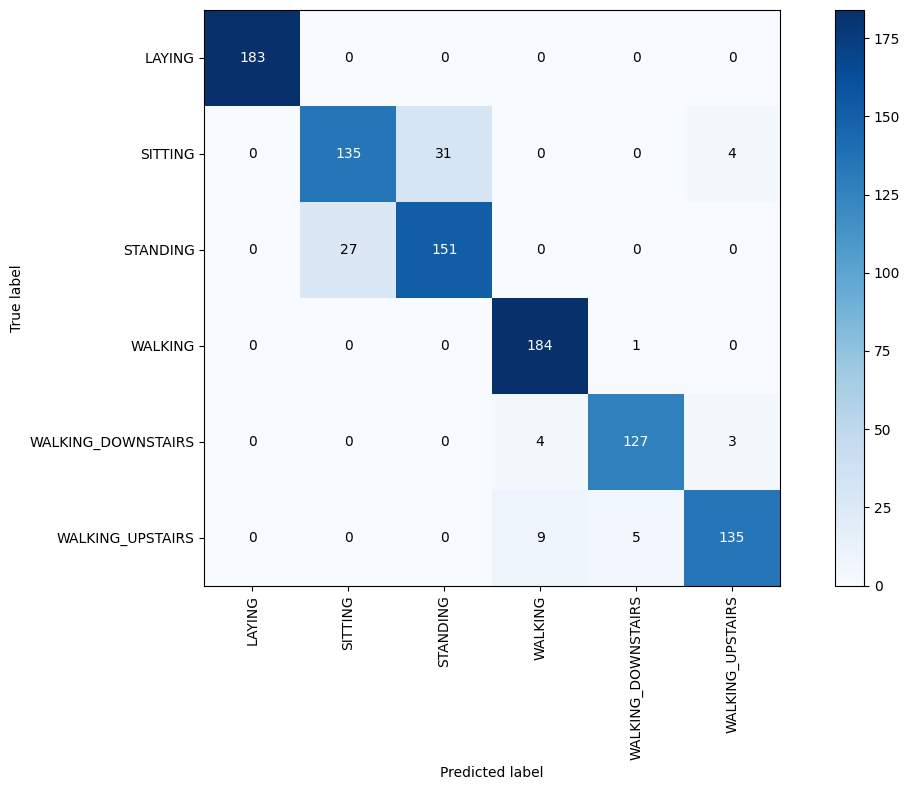

In [98]:
cm = confusion_matrix(ytest.values, knn_pred_y)
plot_confusion_matrix(cm, np.unique(knn_pred_y))

In [100]:
get_best_random_search_estimator(knn_rs)

Best Estimator :  KNeighborsClassifier(n_neighbors=10)
Best Parameters :  {'n_neighbors': 10}
Best Score :  nan


## DONE! THANK YOU :D